# Heart Stroke Prediction


Stroke is a medical condition that can lead to the death of a person. It’s a severe condition and if treated on time we can save one’s life and treat them well. There can be n number of factors that can lead to strokes and in this project, we will try to analyze a few of them. I have taken the dataset from Kaggle. It has 11 variables and 5110 observations.

### Wait, do you think you're gonna have a stroke?!

This is my attempt to build a ML Model to predict if you might have a chance of heart stroke, so that you can be cautious.

In [171]:
import pandas as pd
import numpy as np
df= pd.read_csv(r'C:\Users\mssre\Desktop\Data\healthcare-dataset-stroke-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [172]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [173]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Which Gender is more prone to heart stroke?

C:\Users\mssre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

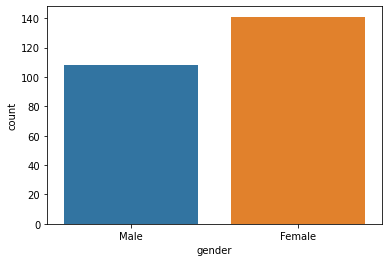

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
df_1= df[df['stroke']==1]
sns.countplot(df_1['gender'])

From the data who had heartstroke, we can see that females are more than males

### Does Smoking have any effect?

C:\Users\mssre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

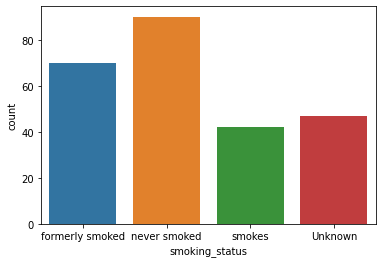

In [193]:
sns.countplot(df_1['smoking_status'])

There's no correlation between smoking status and heart stroke

### Any existing case of heart disease lead to stroke?

C:\Users\mssre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

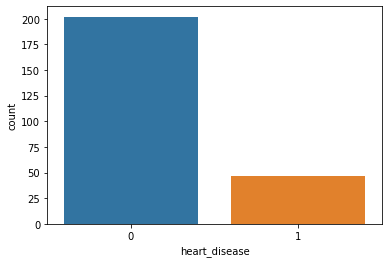

In [176]:
sns.countplot(df_1['heart_disease'])

Again, there's no higher chance that you might have a stroke if you have an underlying heart diesease and vice versa

### Does the place you live have an impact?

C:\Users\mssre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

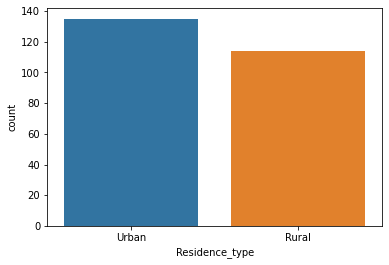

In [177]:
sns.countplot(df_1['Residence_type'])

Even though, its not a significant variation. It's depicted that you're more prone to have a heart attack if you're in urban area

### Age range of people prone to stroke

<AxesSubplot:xlabel='stroke', ylabel='age'>

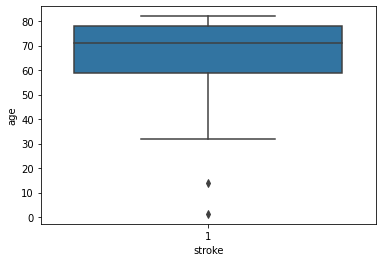

In [194]:
sns.boxplot(y=df_1['age'],x=df_1['stroke'])

C:\Users\mssre\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

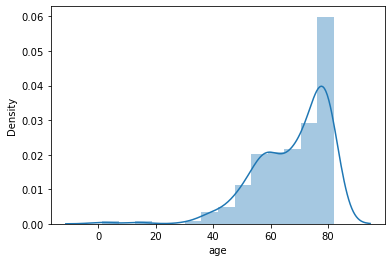

In [195]:
sns.distplot(df_1['age'])

From the above boxplot and distribution plots we can see that people aged above 60 are more prone to stroke and 40-60 age you have maximum probability to have a stroke. 

### Can diabetes have any impact?

C:\Users\mssre\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

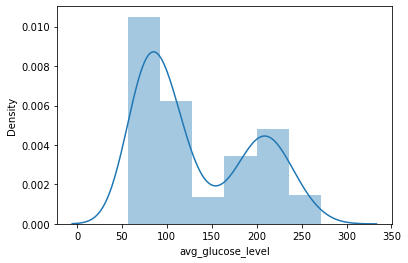

In [180]:
sns.distplot(df_1['avg_glucose_level'])

From the above plot we can deduce that chances of having a heart stroke is independant of blood sugar

### What about BMI?

C:\Users\mssre\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

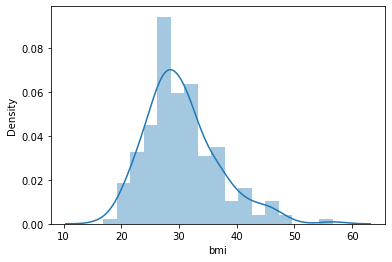

In [181]:
sns.distplot(df_1['bmi'])

Again, chances of having a heart stroke doesn't depend much on BMI. All ranges of bmi had episodes of stroke.

### Hypertension Vs Stroke

C:\Users\mssre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hypertension', ylabel='count'>

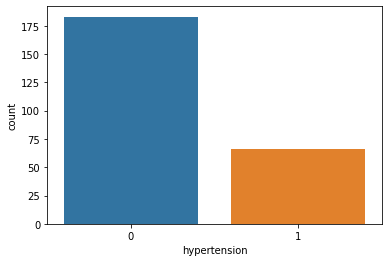

In [196]:
sns.countplot(df_1['hypertension'])

Same goes here too, there's no much evidence that you can have stroke if you pre-existing hypertension

### What do yo do, and possibility of stroke

C:\Users\mssre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='count'>

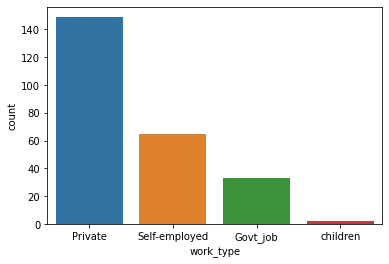

In [183]:
sns.countplot(df_1['work_type'])

Looks like, people who work in private sector are more prone to heart stroke 

## Feature Engineering

In [184]:
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
df['gender']= enc.fit_transform(df['gender'])
df['ever_married']= enc.fit_transform(df['ever_married'])
df['work_type']= enc.fit_transform(df['work_type'])
df['Residence_type']= enc.fit_transform(df['Residence_type'])
df['smoking_status']= enc.fit_transform(df['smoking_status'])

In [185]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

<AxesSubplot:>

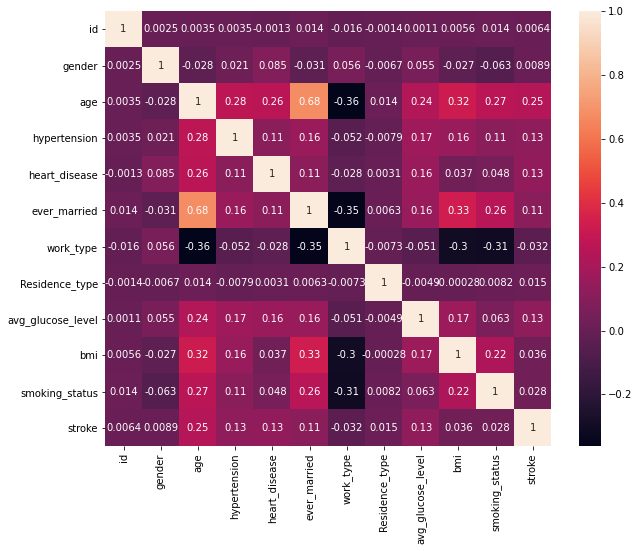

In [186]:
plt.figure(figsize=(10,8))
cor= df.corr()
sns.heatmap(cor,annot=True)

The above plot, represents the correlations of variables. Higher the value of pearson coefficient higher the correlation. We can see that there are no prominent correlations of target variables, we can consider all features for training the model.

In [220]:
x_s= df.drop(['id','stroke','gender'],axis=1)
y= df['stroke']

In [221]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x= sc.fit_transform(x_s)

In [222]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=1255)

### Training and Testing different ML Models for Binary Classification

In [226]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
log= LogisticRegression(max_iter=10000)
log.fit(x_train,y_train)
y_pred= log.predict(x_test)
m.accuracy_score(y_pred,y_test)
print(m.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1605
           1       0.00      0.00      0.00        82

    accuracy                           0.95      1687
   macro avg       0.48      0.50      0.49      1687
weighted avg       0.91      0.95      0.93      1687



C:\Users\mssre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mssre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mssre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [225]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dc= DecisionTreeClassifier(criterion='gini',random_state=1000)
dc.fit(x_train,y_train)
y_pred1= dc.predict(x_test)
m.accuracy_score(y_test,y_pred1)
print(m.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1605
           1       0.14      0.15      0.14        82

    accuracy                           0.91      1687
   macro avg       0.55      0.55      0.55      1687
weighted avg       0.92      0.91      0.92      1687



In [224]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rfs= RandomForestClassifier(random_state=1000,criterion='entropy',n_estimators=25)
rfs.fit(x_train,y_train)
y_pred2=rfs.predict(x_test)
m.accuracy_score(y_pred2,y_test)
print(m.classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1605
           1       0.17      0.01      0.02        82

    accuracy                           0.95      1687
   macro avg       0.56      0.50      0.50      1687
weighted avg       0.91      0.95      0.93      1687



In [223]:
#XGBoost Classifier

from xgboost import XGBClassifier
xg= XGBClassifier()
xg.fit(x_train,y_train)
y_nn= xg.predict(x_test)
print(m.classification_report(y_test,y_nn))

C:\Users\mssre\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:42:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1605
           1       0.22      0.06      0.10        82

    accuracy                           0.94      1687
   macro avg       0.59      0.52      0.53      1687
weighted avg       0.92      0.94      0.93      1687



### Final Thoughts

From the above three models we've trained almost all of them have similar accuracy, but Logistic Regression, Random Forest and XG Boost models have better score.

Does it mean all of them performed well?

Actually no, when we look at the precision and f1-score, it's 0 for Logistic Regression. So we can rule that out. And among Random Forest and XG Boost, accuracy is almost same but precision and f1-score is little higher for XG Boost. 

So we can use the XG Boost classifier for the heart stroke prediction.

